In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

from PIL import Image
from os import listdir
from deepface import DeepFace
from collections import Counter

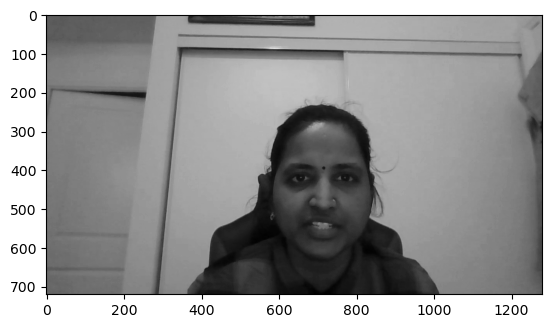

In [12]:
face_img = Image.open("../visualizer/core/test/frame_0002.png")
face_img = cv2.cvtColor(np.uint8(face_img), cv2.COLOR_BGR2GRAY)
plt.imshow(face_img,cmap="grey")
# face_img

In [13]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)
face = face_classifier.detectMultiScale(face_img, scaleFactor=1.3, minNeighbors=5)
face

array([[562, 305, 300, 300]])

## Process Video

In [73]:

cap = cv2.VideoCapture("../data/videos/q2.mp4")

all_emotions = Counter()
frame_idx = 0
fps = cap.get(cv2.CAP_PROP_FPS)

timesteps = []
emotions = []

print(cap.get(cv2.CAP_PROP_FRAME_COUNT)/fps)

while(cap.isOpened()):
  ret, frame = cap.read()

  if ret == True:
    face_analysis = DeepFace.analyze(frame, actions=['emotion'], enforce_detection = False)
    faces_base = face_analysis[0]

    dominant_emotion = faces_base['dominant_emotion']
    all_emotions[dominant_emotion] += 1
    
    timestep = cap.get(cv2.CAP_PROP_POS_MSEC)
    timesteps.append(int(calc_timestep(timestep, int(fps))))

    frame_idx += int(fps)    
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    emotions.append(dominant_emotion)

  else:
    cap.release()

36.0


In [3]:
sorted(dict(all_emotions),reverse=True, key=lambda x: all_emotions[x])

NameError: name 'all_emotions' is not defined

## Testing Mobilenet

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2 
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import Model

In [3]:
def create_model(input_shape, output_shape):
    inputs = tf.keras.Input(shape=input_shape)
    feature_extractor = MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_shape=(128,128,3)
    )
    extracted_features = feature_extractor(inputs, training=True)
    gap = GlobalAveragePooling2D()(extracted_features)
    fc2 = Dense(output_shape, activation="softmax")(gap)
    
    model = Model(inputs=inputs, outputs=fc2)
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
    return model

In [4]:
new_model = create_model(
  input_shape=(128, 128, 3),
  output_shape=3
)
new_model.load_weights("../models/my_model_weights.weights.h5")

c:\Users\patel\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 318 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [67]:
def preprocess_image(image):
    image = image.resize((128, 128),Image.BICUBIC)
    image = np.array(image)
    # image = np.expand_dims(image, axis=2)
    # image = np.repeat(image, 3, axis=2)
    return image

In [1]:
image = Image.open("../data/images/10.png")
image = np.array(image)

face_objs = DeepFace.extract_faces(
  img_path = image, 
)

face = face_objs[0]['face']

face = Image.fromarray(face, "RGB").convert('LA')
# face = preprocess_image(face)

NameError: name 'Image' is not defined